In [3]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [5]:
data=pd.read_csv("C:/Users/User/Dropbox/BDA3/naes04.csv")
#data=pd.read_csv("C:/Users/Tomoki/Documents/Dropbox/BDA3/naes04.csv")

In [6]:
data

,Unnamed: 0,age,gender,race,gayFavorFederalMarriage,gayFavorStateMarriage,gayKnowSomeone
0,1,70,Female,Hispanic,No,NaN,NaN
1,2,54,Female,White,No,NaN,NaN
2,3,74,Male,White,No,NaN,NaN
3,4,73,Female,Other,Yes,No,No
4,5,48,Female,White,No,Yes,Yes
5,6,58,Male,White,No,Yes,Yes
6,7,35,Female,White,Yes,NaN,NaN
7,8,74,Female,White,No,NaN,NaN
8,9,63,Female,White,No,No,No
9,10,64,Male,White,Yes,NaN,NaN


In [11]:
crosstable=pd.crosstab(data.ix[:,1],data.ix[:,6])
crosstable

gayKnowSomeone,No,Yes
age,,
18,152,158
19,103,118
20,97,120
21,124,131
22,133,168
23,150,180
24,167,188
25,178,217
26,161,189


In [21]:
y=crosstable["Yes"]/(crosstable["No"]+crosstable["Yes"])
age=crosstable.index
age=np.array(age)

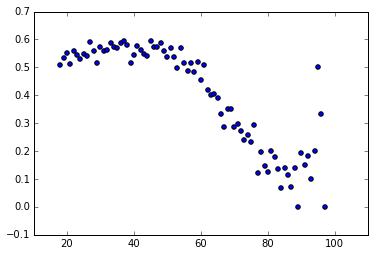

In [13]:
plt.scatter(crosstable.index,crosstable["Yes"]/(crosstable["No"]+crosstable["Yes"]))

In [158]:
# 定数項＋ガウス基底(12次元) 
def phi(x): 
    s = 10.0 # ガウス基底の「幅」
    return np.append(1, np.exp(-(x - np.arange(18, 97 + s, s)) ** 2 / (2 * s * s)))

In [163]:
PHI = np.array([phi(x) for x in age])
w = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, y))

In [160]:
xlist = np.arange(18, 97, 0.1)
ylist = [np.dot(w, phi(x)) for x in xlist]

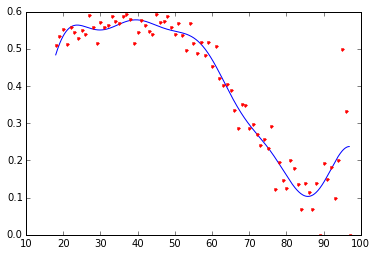

In [161]:
plt.plot(xlist, ylist)
plt.plot(age, y, '.',color="r")
plt.show()

In [168]:
def gibbs_sampler(y,age,a=1.0,b=1.0,nu=1.0,s=1.0,ite=10000,burn_in=5000):
    def phi(x,s=s): 
        return np.append(1, np.exp(-(x-np.arange(np.min(age),np.max(age)+s,s))**2/(2*s**2)))
    
    N=len(y)
    PHI = np.array([phi(x) for x in age])
    PHI=PHI[:,1:]
    I=np.identity(len(PHI.T))

    sigma2=[1.0]
    alpha2=[1.0]
    w=[]
    for i in xrange(ite):
        inv_Sigma_w=1./sigma2[i]*np.dot(PHI.T,PHI)+1./alpha2[i]*np.identity(len(np.dot(PHI.T,PHI)))
        Sigma_w=np.linalg.inv(inv_Sigma_w)
        
        m=1./sigma2[i]*np.dot(np.dot(Sigma_w,PHI.T),y)
        
        w.append(np.random.multivariate_normal(m,Sigma_w).tolist())
        
        sigma2.append(sp.stats.invgamma.rvs(a=1.*N/2+a,scale=(np.dot(y,y)-2*np.dot(y,np.dot(PHI,w[i]))+np.dot(np.dot(w[i],np.dot(PHI.T,PHI)),w[i]))/2+b))
        alpha2.append(sp.stats.invgamma.rvs(a=nu+1,scale=(sigma2[i+1]*np.dot(w[i],np.dot(I,w[i]))+nu)/2))
        
    w=np.array(w)[:burn_in,:].tolist()
    return [w,sigma2[burn_in:],alpha2[burn_in:]]
        

    

In [169]:
result=gibbs_sampler(y,age,s=10.0)

In [170]:
PHI_x=PHI[:,1:]
y_rep=[]
for i in range(len(result[0])):
    mu=np.dot(PHI_x,result[0][i])
    y_rep.append(np.random.multivariate_normal(mu,result[1][i]*np.identity(len(mu))))

In [171]:
Q2_5=np.percentile(y_rep,2.5,axis=0)
Q50=np.percentile(y_rep,50,axis=0)
Q97_5=np.percentile(y_rep,97.5,axis=0)

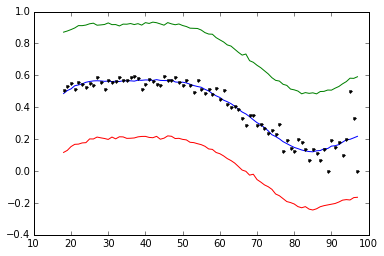

In [172]:
plt.plot(age,Q2_5,"r")
plt.plot(age,Q50,"b")
plt.plot(age,Q97_5,"g")
plt.plot(age, y, '.',color="black")